# Time Series
 - Simple Moving Average
 - Cumulative Moving Average
 - Exponential Moving Average
 - Exponential Weighted Moving Average
  
    -  Exponential Moving average is good

 - Moving Average Models

In [9]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')


In [10]:
data = yf.download('TSLA')

[*********************100%%**********************]  1 of 1 completed


In [11]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2024-02-13,183.990005,187.259995,182.110001,184.020004,184.020004,86759500
2024-02-14,185.300003,188.889999,183.350006,188.710007,188.710007,81203000
2024-02-15,189.160004,200.880005,188.860001,200.449997,200.449997,120831800


## Simple Moving Average 

It is a calculation to analyze data points by creating a series of averages of different selections of the full data set.

<Axes: xlabel='Date'>

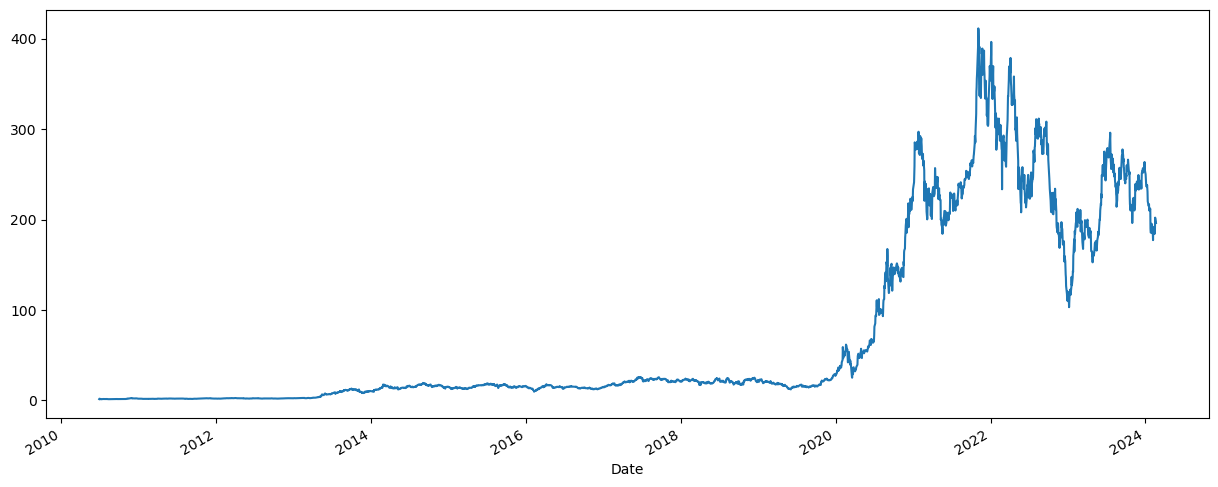

In [12]:
data['Open'].plot(figsize=(15,6))

In [13]:
data['Open:10 days rolling'] = data['Open'].rolling(window =10, min_periods =1).mean()

<Axes: xlabel='Date'>

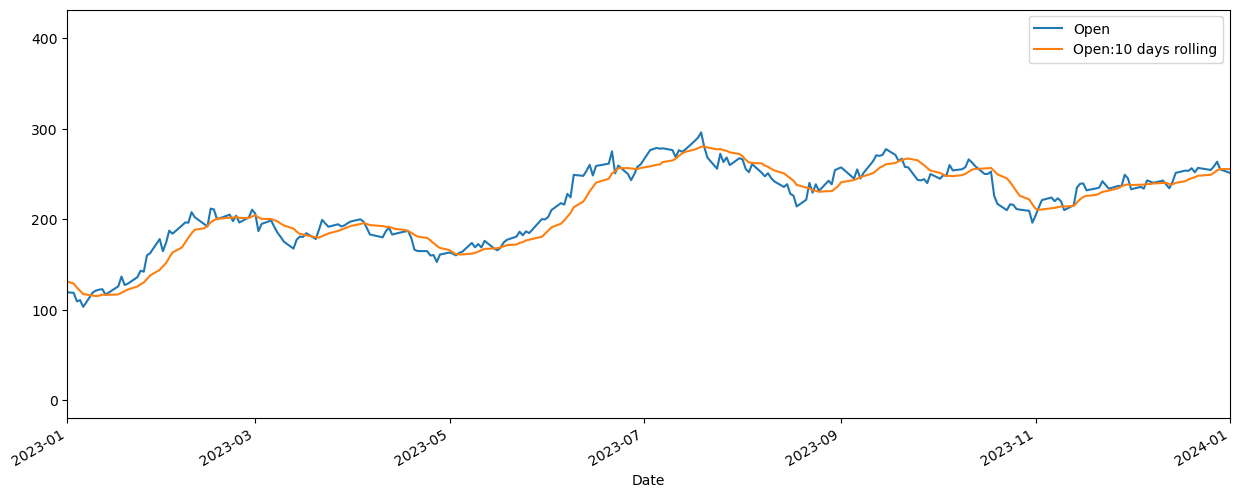

In [14]:
data[['Open', 'Open:10 days rolling']].plot(figsize=(15,6),xlim = ['2023-01-01','2024-01-01'])

In [15]:
data['Open:30 days rolling'] = data['Open'].rolling(window =30, min_periods =1).mean()

In [16]:
data['Open:50 days rolling'] = data['Open'].rolling(window =50, min_periods =1).mean()

<Axes: xlabel='Date'>

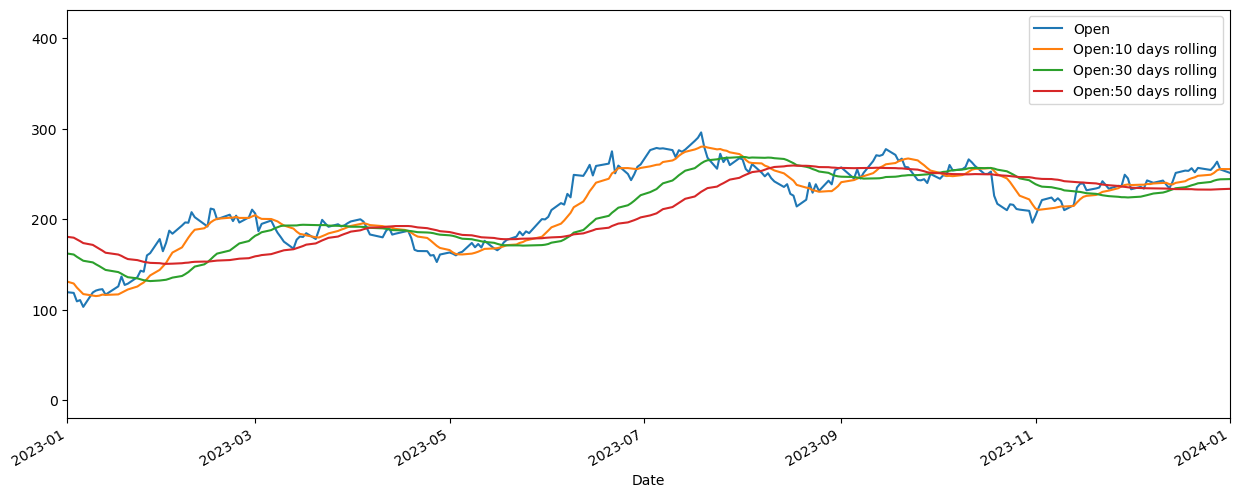

In [17]:
data[['Open', 'Open:10 days rolling','Open:30 days rolling','Open:50 days rolling']].plot(figsize=(15,6),xlim = ['2023-01-01','2024-01-01'])

## Cumulative Moving Average



<Axes: xlabel='Date'>

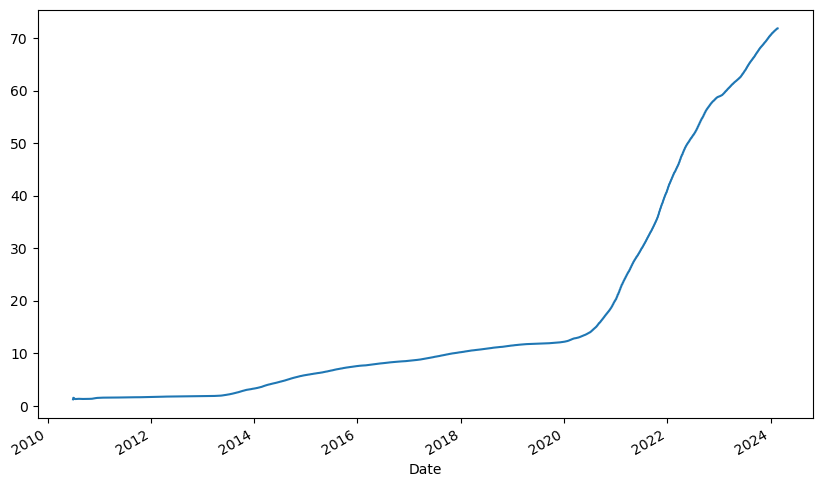

In [18]:
## Expanding

data['Open'].expanding().mean().plot(figsize=(10,6))

## Exponential Moving Average [EMA]

- It is a rule of thumb technique for smoothing time series data using the exponential window funcion
- Focus should be more on current upcoming data or just recent data.

- Formula  : (close - Prev EMA)*multilpier)+ Prev EMA
     - multiplier  = (2/(EMA rolling  window size + 1))

- For 1st 10 records we will calculate simple moving average

In [19]:
# alpha =  soothing factor = 0.1
data['EMA_0.1'] = data['Open'].ewm(alpha=0.1,adjust = False).mean()

<Axes: xlabel='Date'>

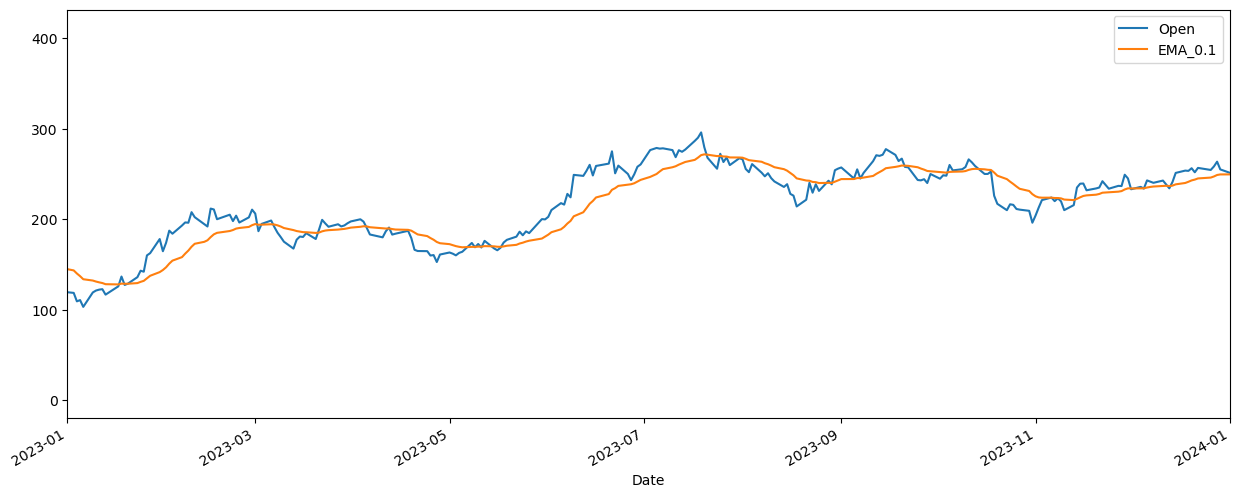

In [20]:
data[['Open', 'EMA_0.1']].plot(figsize=(15,6),xlim = ['2023-01-01','2024-01-01'])

In [21]:
data['EMA_0.3'] = data['Open'].ewm(alpha=0.3,adjust = False).mean()

<Axes: xlabel='Date'>

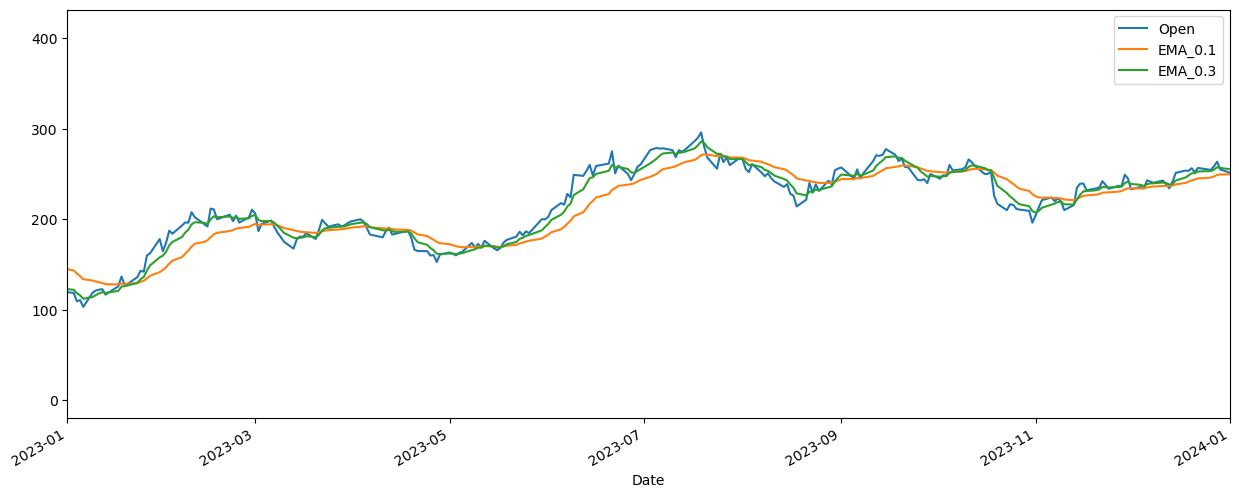

In [22]:
data[['Open', 'EMA_0.1','EMA_0.3']].plot(figsize=(15,6),xlim = ['2023-01-01','2024-01-01'])

## Exponential Weighted Moving Average [EWMA]

- formula  = a * x(t) + (1-a) EMWA(t-1)

In [23]:
## EWMA
# Span , period = 5 days
data['EWMA_5days'] = data['Open'].ewm(span=5).mean()

<Axes: xlabel='Date'>

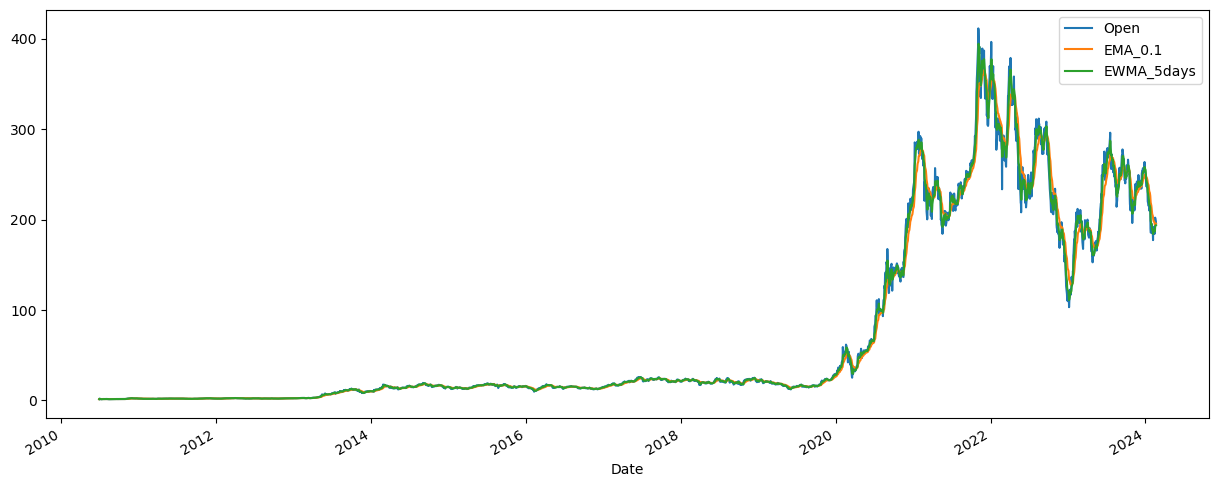

In [24]:
data[['Open','EMA_0.1','EWMA_5days']].plot(figsize=(15,6))

# ARIMA

  -     AR            +   I  +         MA
   (Auto Regression) ---> + <----(Moving Average)
                      
                      ARMA Model
             (Forecasting -- Sales, Monthly)
             
What does ARIMA(p, d, q) mean?

For example :

- ARIMA(1, 0, 3) signifies that you're combining a 1st order Auto-Regressive model and a 3rd order Moving Average model to describe some response variable (Y) in your model. It's a good idea to think about it this way: (AR, I, MA). In simple words, this gives your model the following appearance:

    Y = (Auto-Regressive Parameters) + (Moving Average Parameters)


- The 0 between the 1 and the 3 represents the 'I' part of the model (the Integrative component), which denotes a model that takes the difference between response variable data - this can be done with non-stationary data, but you don't appear to be dealing with that, so ignore it.

- ARIMA(2, 1, 2) signifies that you're combining a 2nd order AR model and also a 2nd order MA model to describe Y. d = 1st denotes that the model used 1 order differencing to make the data stationary.

In [25]:
data.reset_index(inplace=True)

In [26]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Open:10 days rolling,Open:30 days rolling,Open:50 days rolling,EMA_0.1,EMA_0.3,EWMA_5days
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,1.493000,1.493000,1.493000,1.311934,1.402467,1.538267
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,1.550889,1.550889,1.550889,1.347407,1.481727,1.599088
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1.546500,1.546500,1.546500,1.366000,1.497209,1.571774
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1.503867,1.503867,1.503867,1.362733,1.448046,1.480240
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3429,2024-02-13,183.990005,187.259995,182.110001,184.020004,184.020004,86759500,186.546999,208.169001,223.688201,196.103362,187.561872,187.483544
3430,2024-02-14,185.300003,188.889999,183.350006,188.710007,188.710007,81203000,186.376999,206.009667,222.731401,195.023027,186.883311,186.755697
3431,2024-02-15,189.160004,200.880005,188.860001,200.449997,200.449997,120831800,186.442999,204.149001,221.799601,194.436724,187.566319,187.557132
3432,2024-02-16,202.059998,203.169998,197.399994,199.949997,199.949997,111173600,188.145000,202.909334,221.163401,195.199052,191.914423,192.391421


In [27]:
stock_data = data[['Date','Close']]

In [28]:
stock_data

,Date,Close
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000
...,...,...
3429,2024-02-13,184.020004
3430,2024-02-14,188.710007
3431,2024-02-15,200.449997
3432,2024-02-16,199.949997


In [29]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3434 entries, 0 to 3433
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3434 non-null   datetime64[ns]
 1   Close   3434 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 53.8 KB


In [30]:
stock_data = stock_data.set_index("Date")

In [31]:
stock_data

,Close
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000
...,...
2024-02-13,184.020004
2024-02-14,188.710007
2024-02-15,200.449997


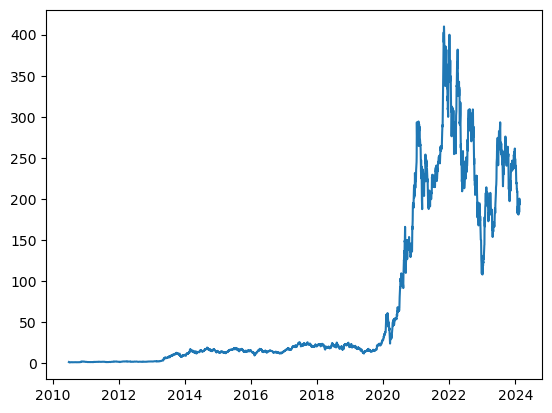

In [32]:
import matplotlib.pyplot as plt
plt.plot(stock_data['Close'])

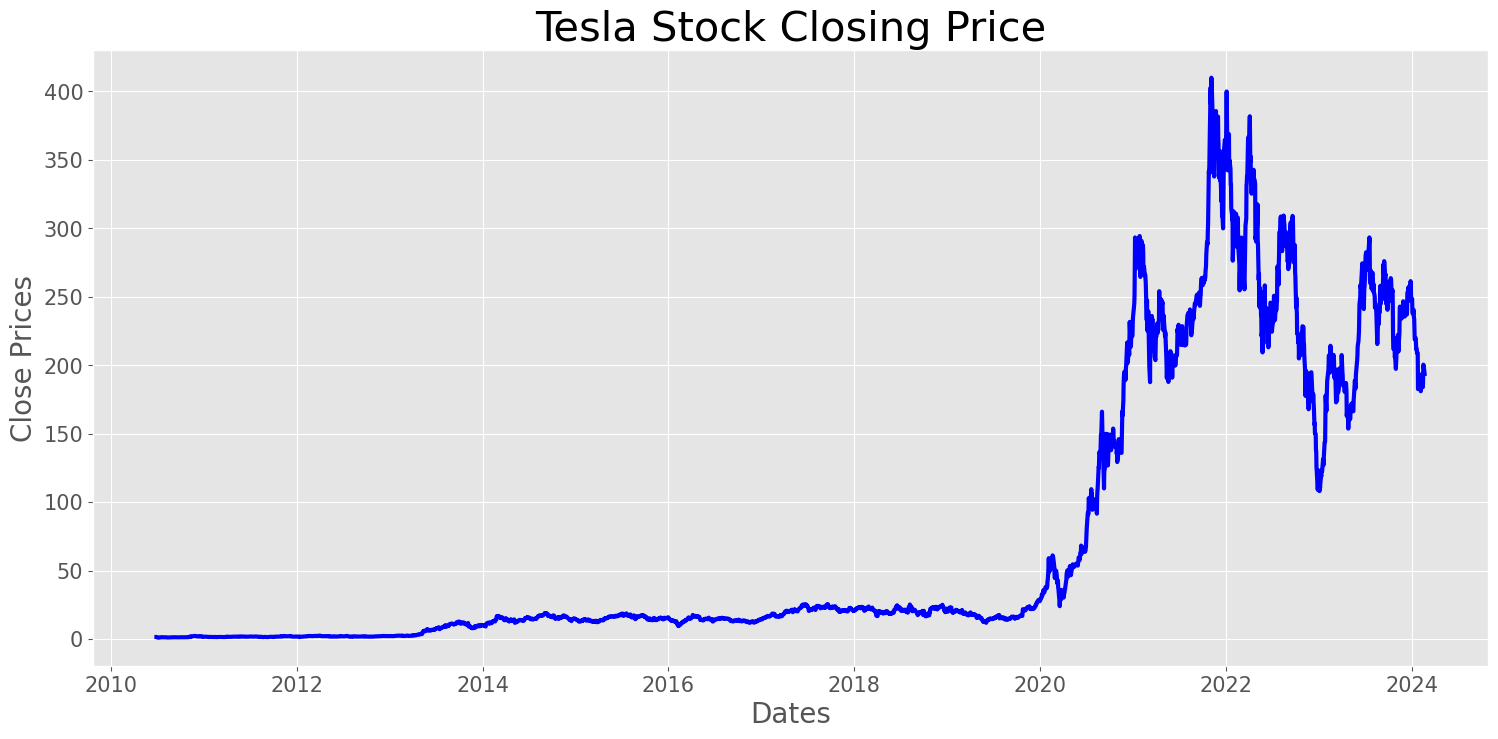

In [33]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15) 
plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

<Axes: xlabel='Close', ylabel='Density'>

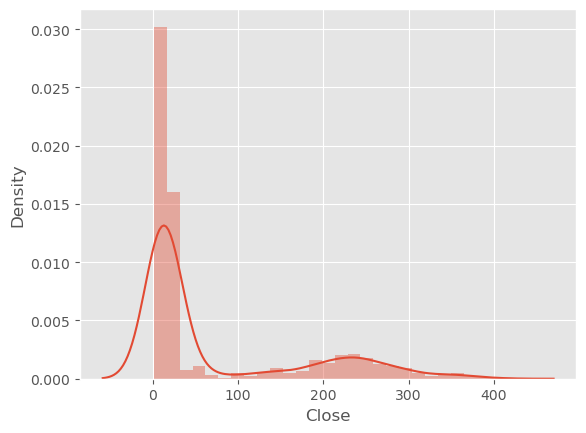

In [34]:
import seaborn as sns
sns.distplot(stock_data['Close'])

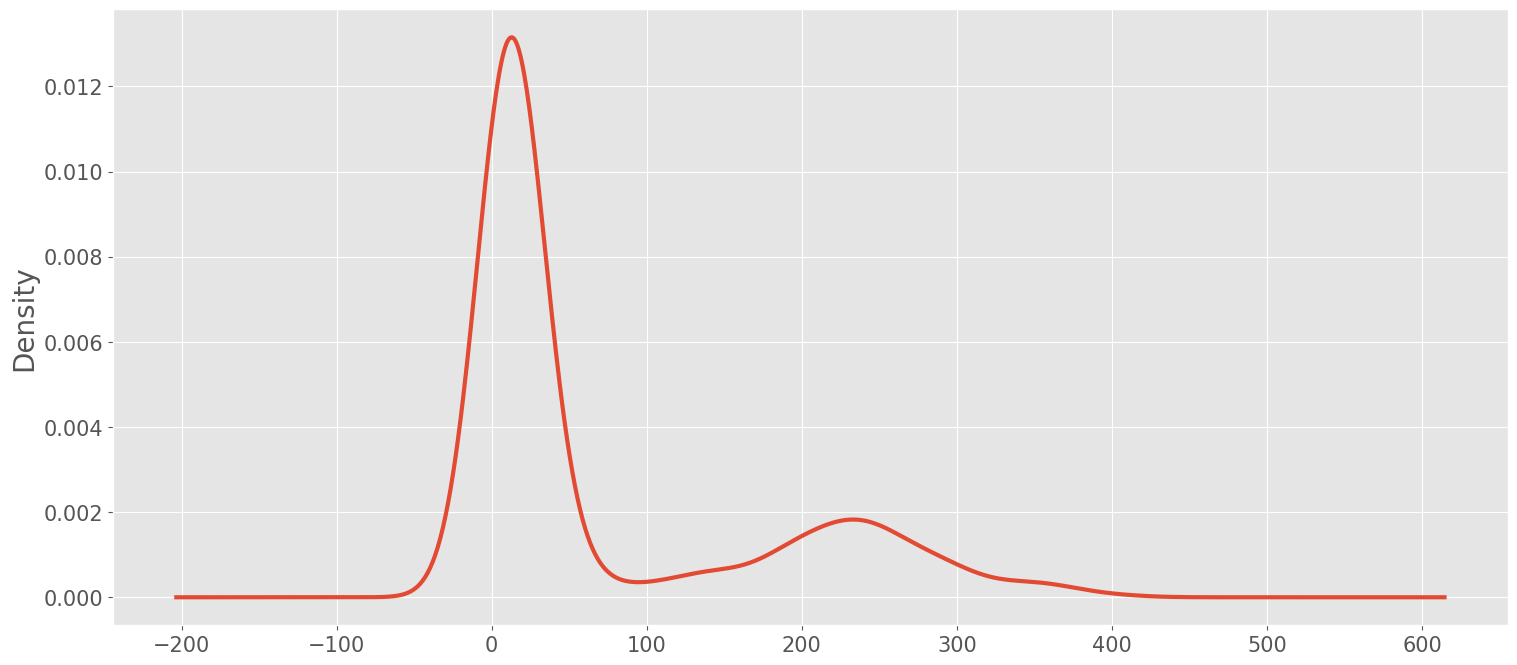

In [35]:
# Distribution of the close price  
df_close = stock_data['Close'] 
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [36]:
type(stock_data['Close'])

pandas.core.series.Series

In [37]:
import numpy as np
np.mean(stock_data['Close'].head(12))

1.2809444963932037

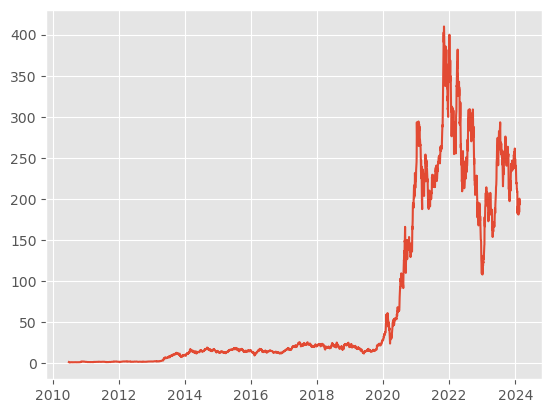

In [38]:
plt.plot(stock_data['Close'])

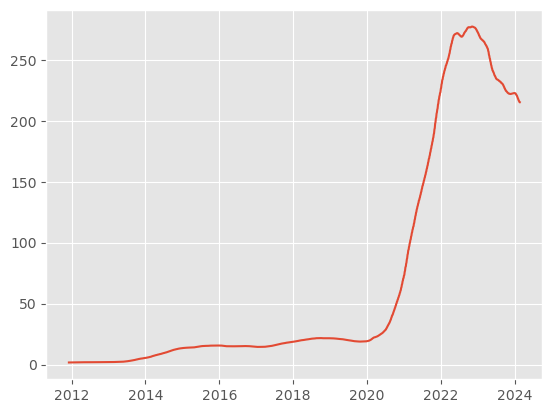

In [39]:
plt.plot(stock_data['Close'].rolling(365).mean())

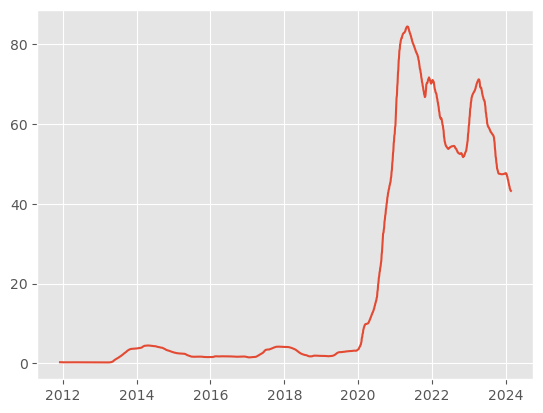

In [40]:
plt.plot(stock_data['Close'].rolling(365).std())

## Akaike Information Criterion(AIC)

- For all possible parameter constellations from both lists pdq and seasonal_pdq the algorithm will create a model and eventually pick the best one to proceed.
- The best model is chosen based on AIC.

- It is a measure of relative quality of statistical models for a given set of data.

In [41]:
from statsmodels.tsa.stattools import adfuller
adfuller(stock_data['Close'],autolag='AIC')

(-1.2015646012084387,
 0.6729222981027199,
 29,
 3404,
 {'1%': -3.432272514134128,
  '5%': -2.8623894557245357,
  '10%': -2.5672221813177556},
 20034.369359473738)

In [42]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() # rolling mean
    rolstd = timeseries.rolling(12).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

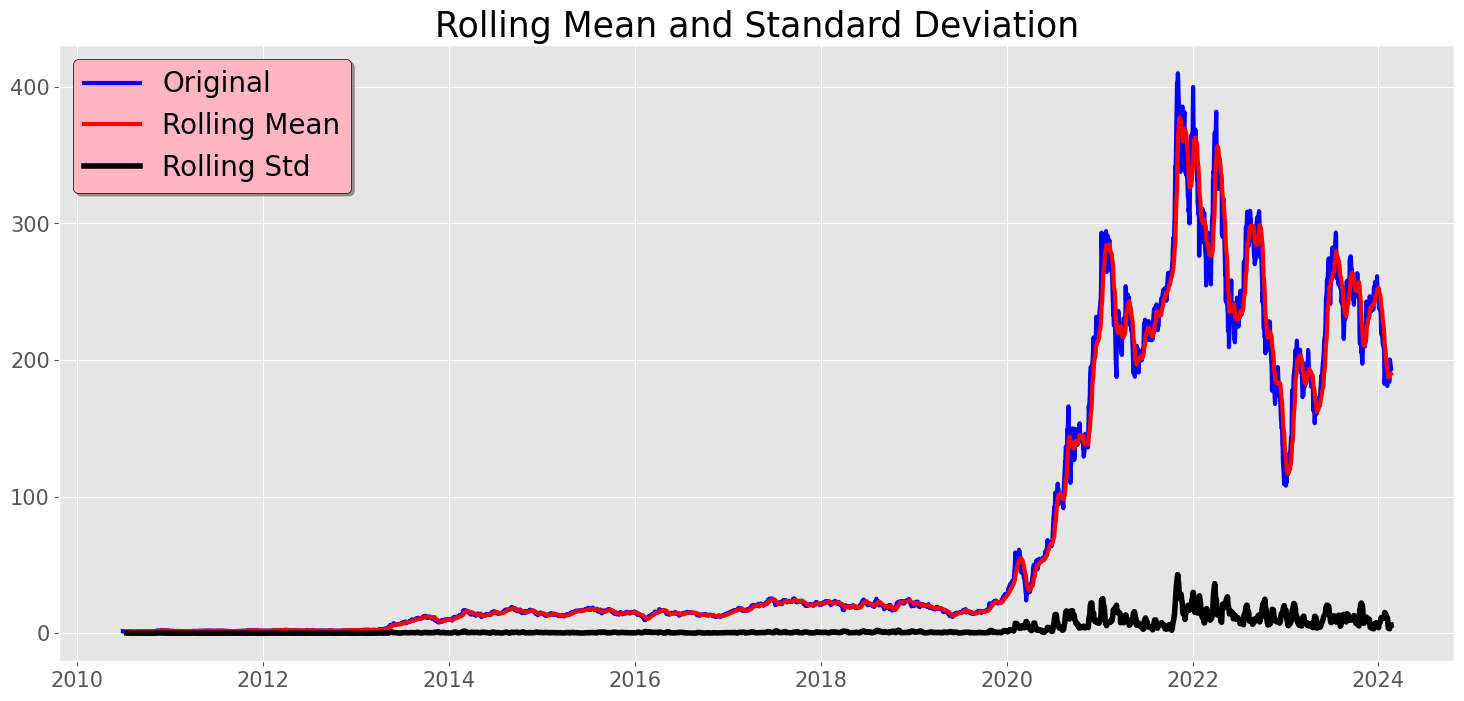

Results of dickey fuller test
Test Statistics                  -1.201565
p-value                           0.672922
No. of lags used                 29.000000
Number of observations used    3404.000000
critical value (1%)              -3.432273
critical value (5%)              -2.862389
critical value (10%)             -2.567222
dtype: float64


In [43]:
test_stationarity(stock_data['Close'])

-  p-value is bigger than 0.05 so cannot reject null hypothesis.Hence data is not stationary.

In [44]:
df_close=stock_data['Close']
df_close

Date
2010-06-29      1.592667
2010-06-30      1.588667
2010-07-01      1.464000
2010-07-02      1.280000
2010-07-06      1.074000
                 ...    
2024-02-13    184.020004
2024-02-14    188.710007
2024-02-15    200.449997
2024-02-16    199.949997
2024-02-20    193.759995
Name: Close, Length: 3434, dtype: float64

In [45]:
df_close.diff()

Date
2010-06-29          NaN
2010-06-30    -0.004000
2010-07-01    -0.124667
2010-07-02    -0.184000
2010-07-06    -0.206000
                ...    
2024-02-13    -4.110001
2024-02-14     4.690002
2024-02-15    11.739990
2024-02-16    -0.500000
2024-02-20    -6.190002
Name: Close, Length: 3434, dtype: float64

In [46]:
# Get the difference of each Adj Close point
tsla_close_diff_1 = df_close.diff()

In [47]:
tsla_close_diff_1 

Date
2010-06-29          NaN
2010-06-30    -0.004000
2010-07-01    -0.124667
2010-07-02    -0.184000
2010-07-06    -0.206000
                ...    
2024-02-13    -4.110001
2024-02-14     4.690002
2024-02-15    11.739990
2024-02-16    -0.500000
2024-02-20    -6.190002
Name: Close, Length: 3434, dtype: float64

In [48]:
tsla_close_diff_1.dropna(inplace=True)

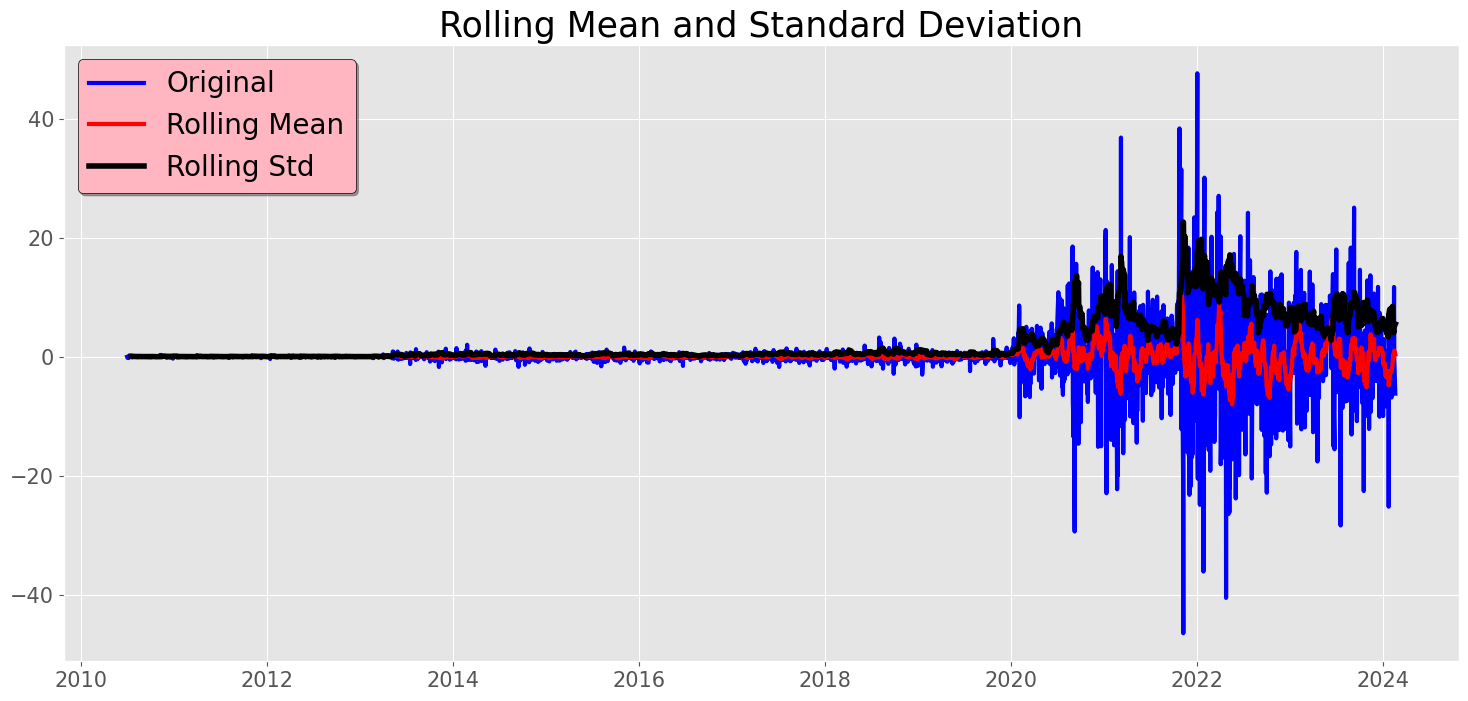

Results of dickey fuller test
Test Statistics               -1.114693e+01
p-value                        3.009900e-20
No. of lags used               2.800000e+01
Number of observations used    3.404000e+03
critical value (1%)           -3.432273e+00
critical value (5%)           -2.862389e+00
critical value (10%)          -2.567222e+00
dtype: float64


In [49]:
# Plot the tsla Adj Close 1st order difference
test_stationarity(tsla_close_diff_1)

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["Close"]],period=30)

<Figure size 2000x1000 with 0 Axes>

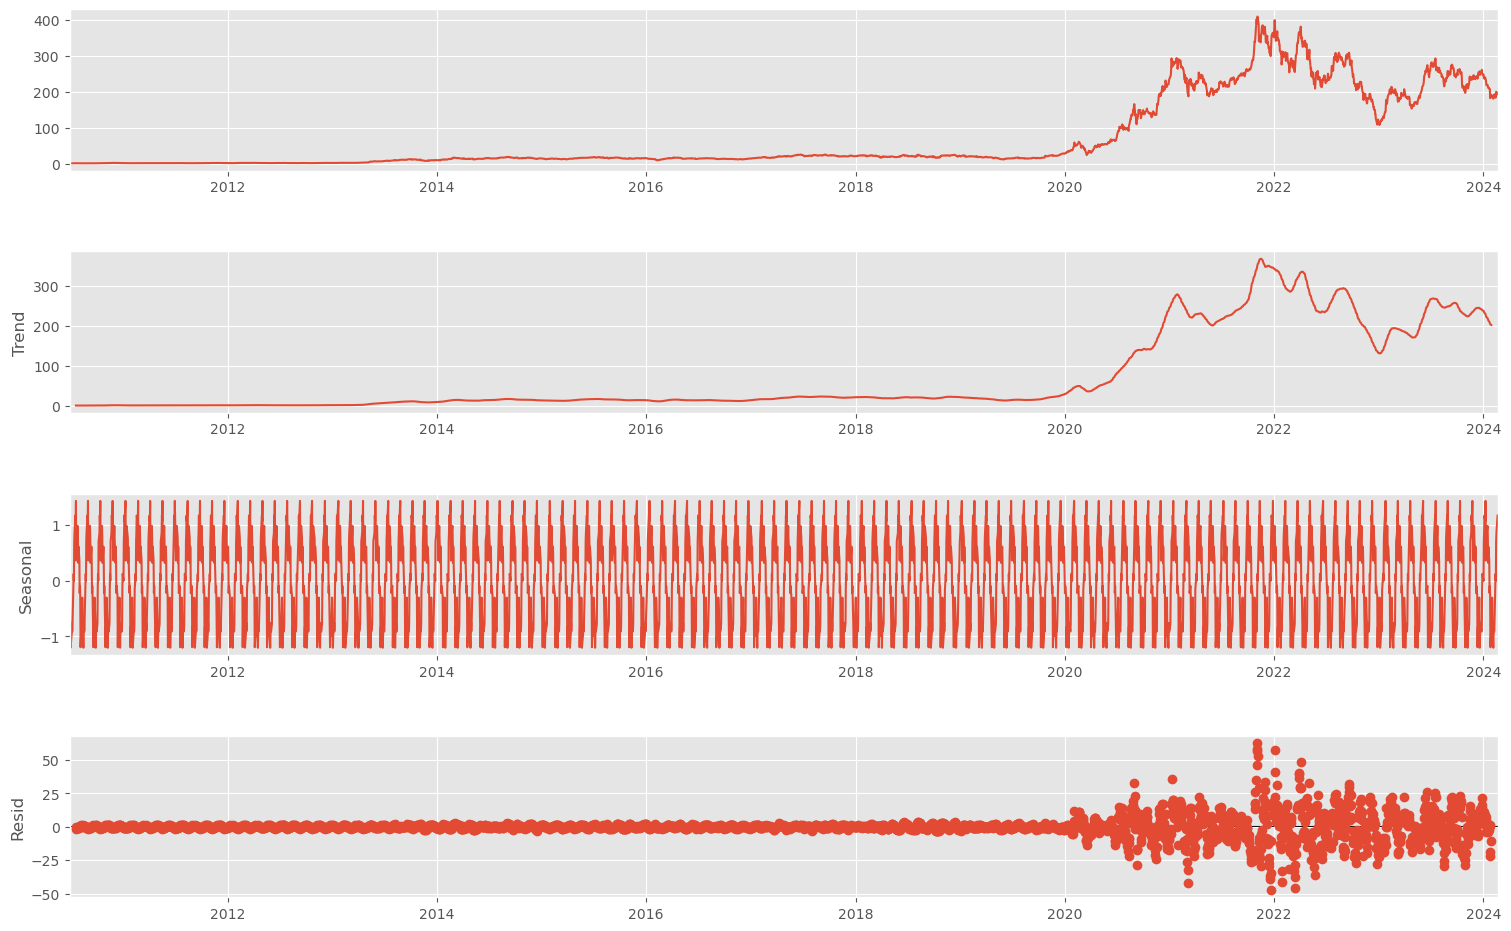

In [51]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

<Figure size 2000x1000 with 0 Axes>

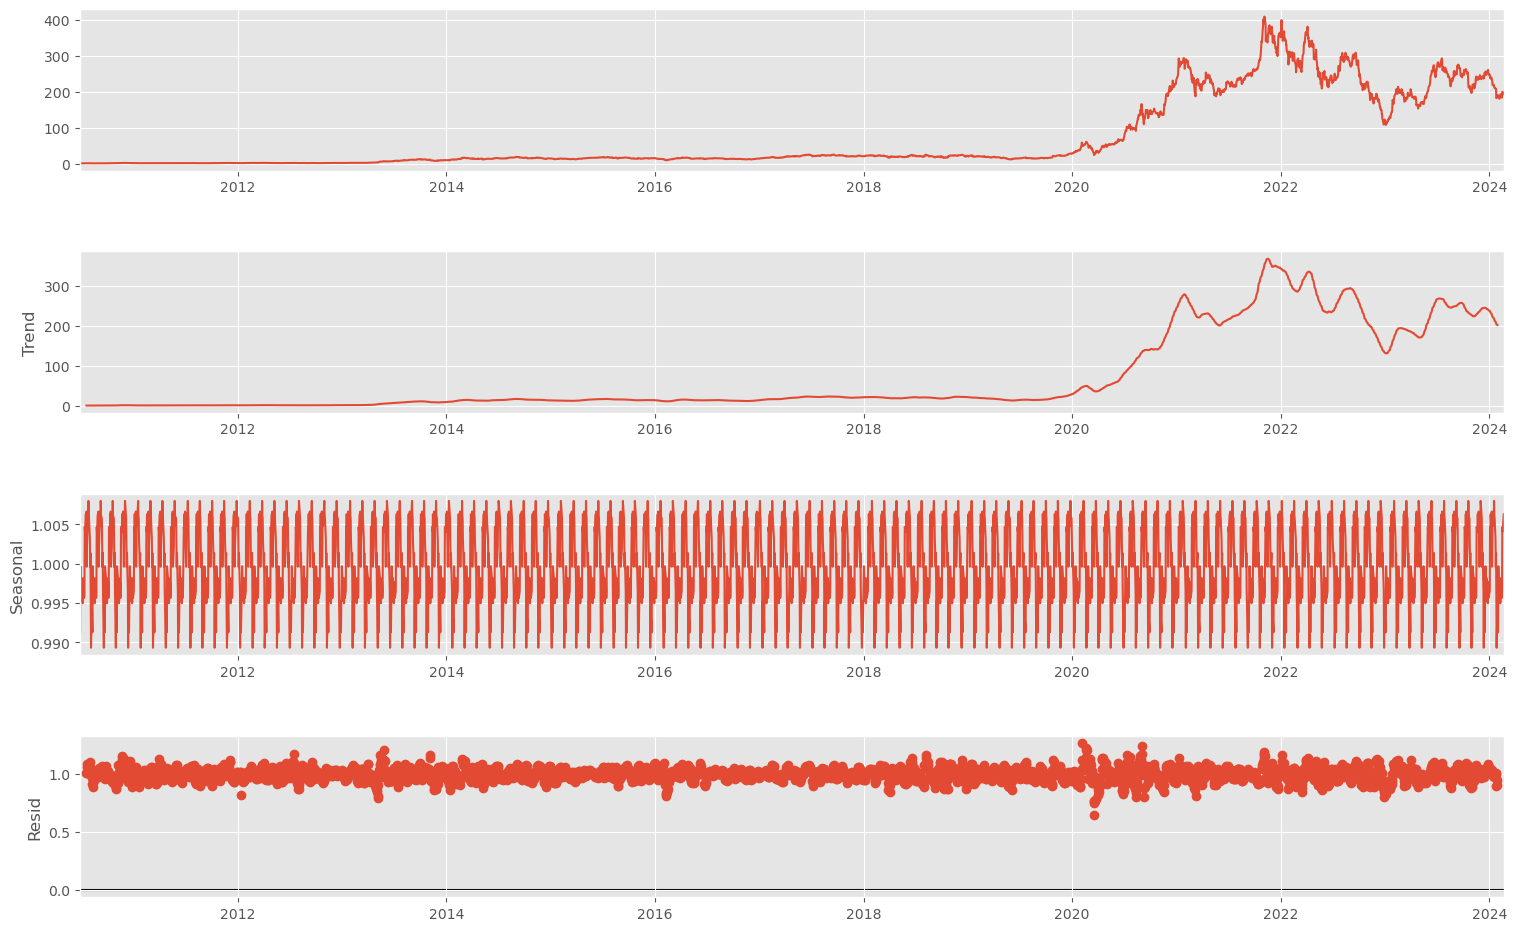

In [52]:
result=seasonal_decompose(stock_data[["Close"]],model="multiplicative",period=30)
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [53]:
train_data = df_close[0:-60]

In [54]:
test_data = df_close[-60:]

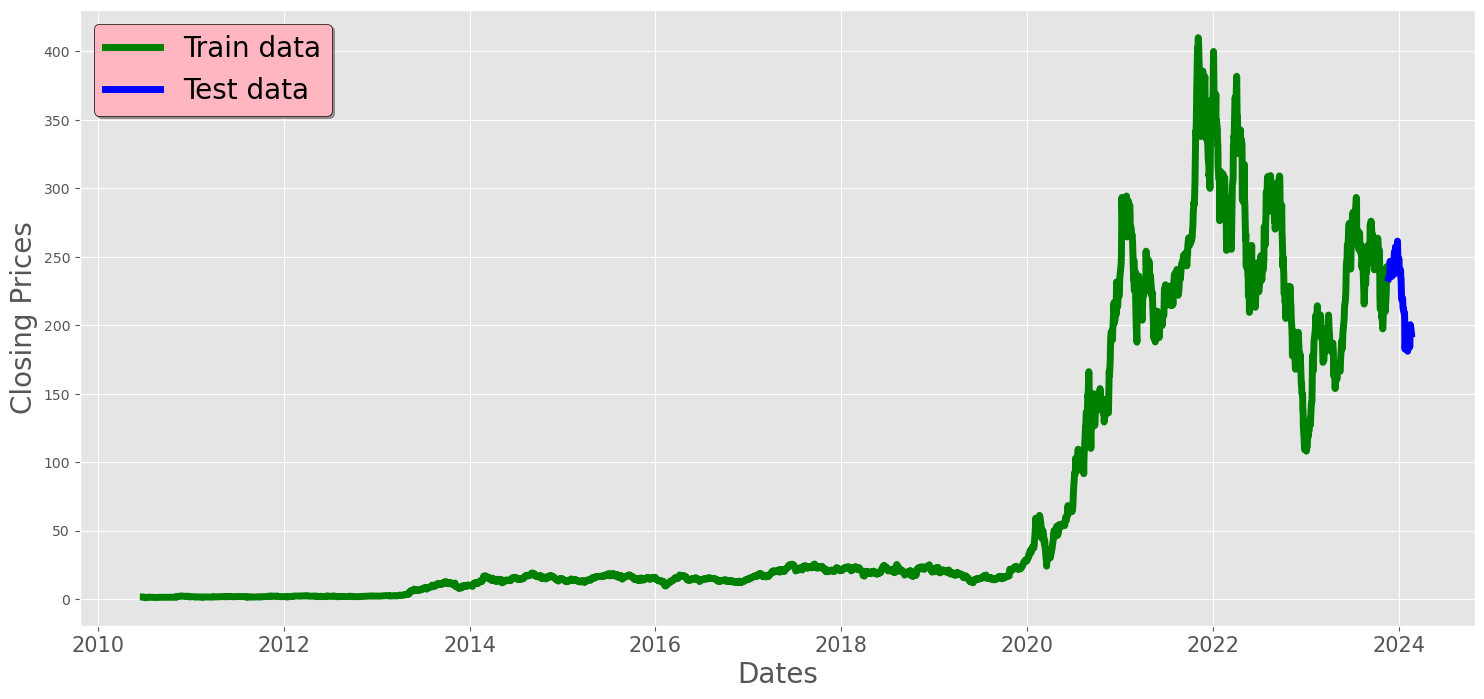

In [55]:
#split data into train and training set
train_data=df_close[0:-60]
test_data=df_close[-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closing Prices', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [56]:
var1=tsla_close_diff_1

In [57]:
var=tsla_close_diff_1[1:]

In [58]:

df=pd.DataFrame([var,var1])

In [59]:
df.T.corr

<bound method DataFrame.corr of                 Close      Close
Date                            
2010-06-30        NaN  -0.004000
2010-07-01  -0.124667  -0.124667
2010-07-02  -0.184000  -0.184000
2010-07-06  -0.206000  -0.206000
2010-07-07  -0.020667  -0.020667
...               ...        ...
2024-02-13  -4.110001  -4.110001
2024-02-14   4.690002   4.690002
2024-02-15  11.739990  11.739990
2024-02-16  -0.500000  -0.500000
2024-02-20  -6.190002  -6.190002

[3433 rows x 2 columns]>

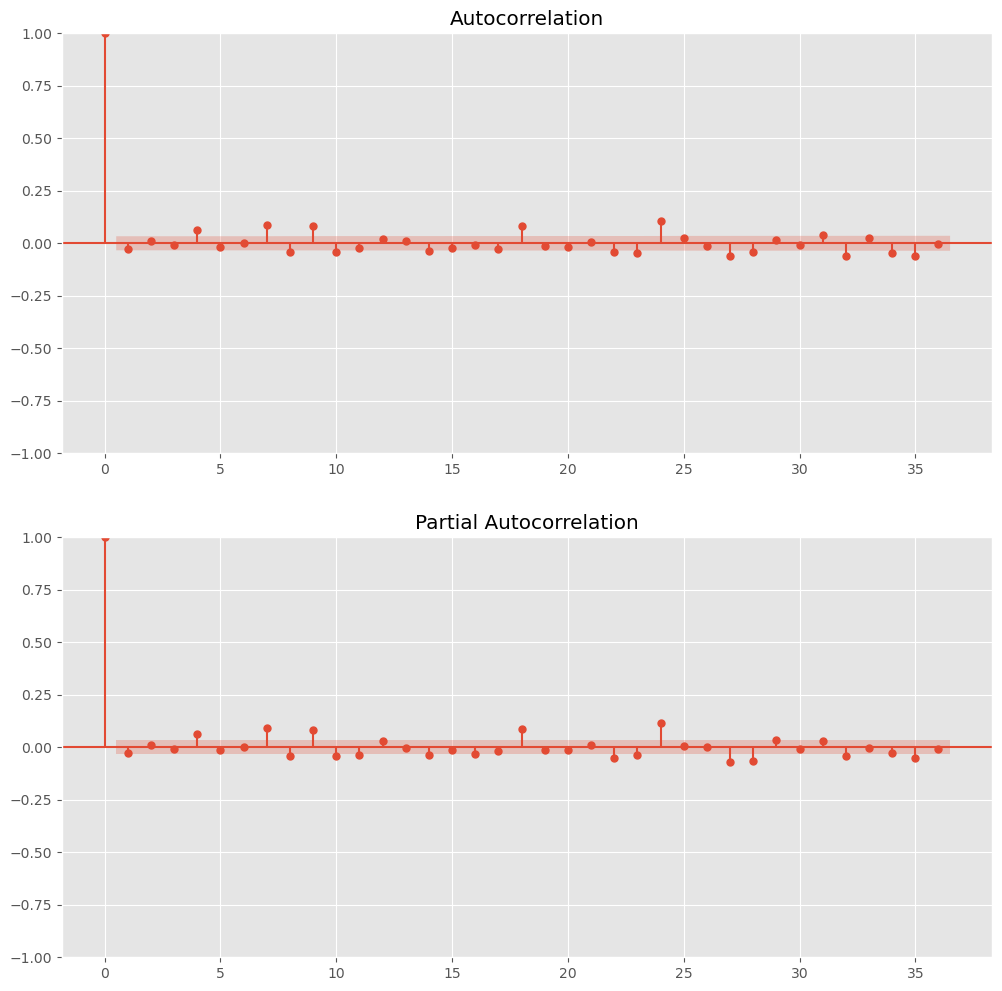

In [60]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)#function
fig = plot_acf(tsla_close_diff_1, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(tsla_close_diff_1, ax=ax2)

In [61]:
from statsmodels.tsa.arima.model import ARIMA

In [62]:
def evaluate_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [63]:
float('inf')

inf

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [65]:
# evaluate different combinations of p, d and q values for an ARIMA model to get the best order for ARIMA Model
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [66]:
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=154.751
ARIMA(0, 0, 1) RMSE=78.864
ARIMA(0, 0, 2) RMSE=47.564
ARIMA(0, 1, 0) RMSE=5.868
ARIMA(0, 1, 1) RMSE=5.868
ARIMA(0, 1, 2) RMSE=5.880
ARIMA(0, 2, 0) RMSE=8.346
ARIMA(0, 2, 1) RMSE=5.880
ARIMA(0, 2, 2) RMSE=5.878
ARIMA(1, 0, 0) RMSE=5.853
ARIMA(1, 0, 1) RMSE=5.853
ARIMA(1, 0, 2) RMSE=5.865
ARIMA(1, 1, 0) RMSE=5.869
ARIMA(1, 1, 1) RMSE=5.887
ARIMA(1, 1, 2) RMSE=5.892
ARIMA(1, 2, 0) RMSE=7.582
ARIMA(1, 2, 1) RMSE=5.879
ARIMA(1, 2, 2) RMSE=5.882
ARIMA(2, 0, 0) RMSE=5.854
ARIMA(2, 0, 1) RMSE=5.871
ARIMA(2, 0, 2) RMSE=5.847
ARIMA(2, 1, 0) RMSE=5.882
ARIMA(2, 1, 1) RMSE=5.892
ARIMA(2, 1, 2) RMSE=5.891
ARIMA(2, 2, 0) RMSE=6.993
ARIMA(2, 2, 1) RMSE=5.892
ARIMA(2, 2, 2) RMSE=5.879
Best ARIMA(2, 0, 2) RMSE=5.847


In [67]:
arima_order=(1,0,1)

In [68]:
history = [x for x in train_data]
history

[1.5926669836044312,
 1.5886670351028442,
 1.4639999866485596,
 1.2799999713897705,
 1.0740000009536743,
 1.053333044052124,
 1.1640000343322754,
 1.159999966621399,
 1.136667013168335,
 1.2093329429626465,
 1.3226670026779175,
 1.3259999752044678,
 1.3760000467300415,
 1.4606670141220093,
 1.3533329963684082,
 1.3480000495910645,
 1.399999976158142,
 1.4193329811096191,
 1.3966670036315918,
 1.3700000047683716,
 1.3813329935073853,
 1.3566670417785645,
 1.329332947731018,
 1.3946670293807983,
 1.463333010673523,
 1.4173330068588257,
 1.363332986831665,
 1.305999994277954,
 1.3066669702529907,
 1.2686669826507568,
 1.1933330297470093,
 1.1733330488204956,
 1.2213330268859863,
 1.2519999742507935,
 1.2766669988632202,
 1.2513329982757568,
 1.25266695022583,
 1.273332953453064,
 1.3420000076293945,
 1.2799999713897705,
 1.3266669511795044,
 1.3166669607162476,
 1.3133330345153809,
 1.324666976928711,
 1.2986669540405273,
 1.363332986831665,
 1.4040000438690186,
 1.4033329486846924,
 1.36

In [69]:
model = ARIMA(history, order=arima_order)

In [70]:
model_fit = model.fit()

In [71]:
yhat = model_fit.summary()

In [72]:
yhat

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3374
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -9979.689
Date:                Wed, 21 Feb 2024   AIC                          19967.377
Time:                        12:59:26   BIC                          19991.873
Sample:                             0   HQIC                         19976.136
                               - 3374                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.1266    248.743      0.278      0.781    -418.400     556.653
ar.L1          0.9994      0.001   1173.893      0.000       0.998       1.001
ma.L1         -0.0274      0.008     -3.369      0.001      -0.043      -0.011
sigma2        21.6673      0.162    133.622      0.000      21.350      21.985
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             54104.51
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):             894.28   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
history = [x for x in train_data]
predictions = list()
conf_list = list()

for t in range(len(test_data)):
    model = ARIMA(history, order=(0, 1, 0))
    model_fit = model.fit()
    
    # Use get_forecast to obtain forecast and confidence intervals
    forecast = model_fit.get_forecast(steps=1, alpha=0.05)
    
    # Extract forecasted values and confidence intervals
    fc = forecast.predicted_mean[0]
    conf_int = forecast.conf_int(alpha=0.05)[0]
    
    predictions.append(fc)
    conf_list.append(conf_int)
    history.append(test_data[t])
predictions = np.array(predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print('RMSE of ARIMA Model:', rmse)


RMSE of ARIMA Model: 5.86796052608669


In [80]:
predictions

array([241.19999695, 234.21000671, 235.44999695, 236.08000183,
       246.72000122, 244.13999939, 240.08000183, 238.83000183,
       235.58000183, 238.72000122, 239.36999512, 242.63999939,
       243.83999634, 239.74000549, 237.00999451, 239.28999329,
       251.05000305, 253.5       , 252.08000183, 257.22000122,
       247.13999939, 254.5       , 252.53999329, 256.60998535,
       261.44000244, 253.17999268, 248.47999573, 248.41999817,
       238.44999695, 237.92999268, 237.49000549, 240.44999695,
       234.96000671, 233.94000244, 227.22000122, 218.88999939,
       219.91000366, 215.55000305, 211.88000488, 212.19000244,
       208.80000305, 209.13999939, 207.83000183, 182.63000488,
       183.25      , 190.92999268, 191.58999634, 187.28999329,
       188.86000061, 187.91000366, 181.05999756, 185.1000061 ,
       187.58000183, 189.55999756, 193.57000732, 188.13000488,
       184.02000427, 188.71000671, 200.44999695, 199.94999695])

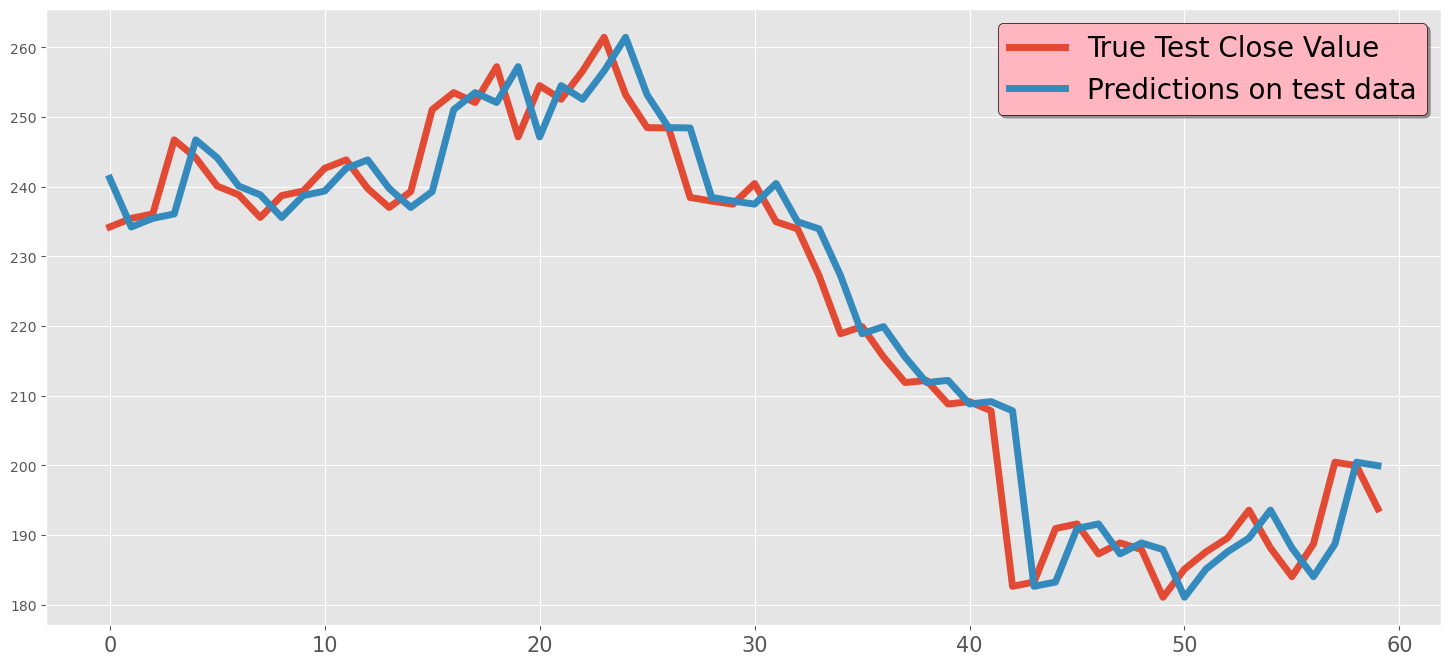

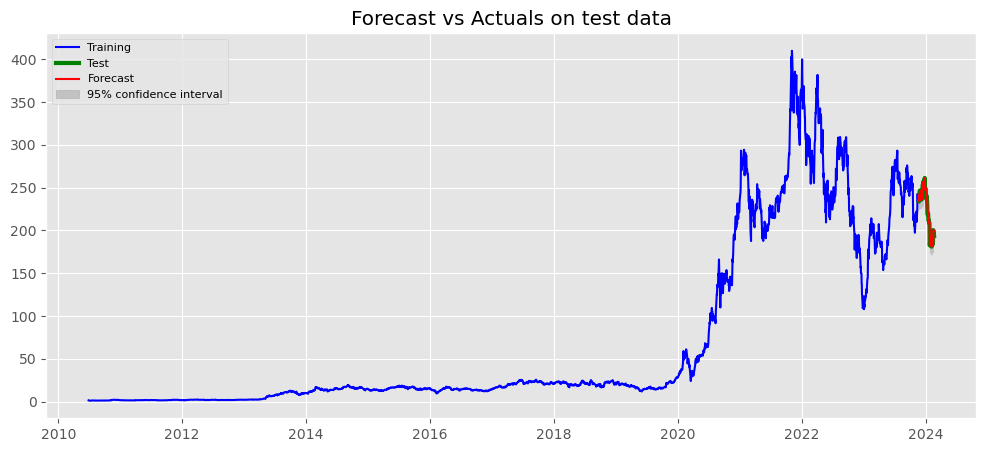

In [82]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

# Make as pandas series
lower_series = []
upper_series = []
for i in conf_list:
    lower_series.append(i[0])
    upper_series.append(i[0])
    
fc_series = pd.Series(predictions, index=test_data.index)
lower_series = pd.Series(lower_series, index=test_data.index)
upper_series = pd.Series(upper_series, index=test_data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15, label = '95% confidence interval')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# SARIMA Model

In [85]:
train_data=tsla_close_diff_1[0:-60]
test_data=tsla_close_diff_1[-60:]

In [87]:
import statsmodels.api as sm

history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 8.300277615009062


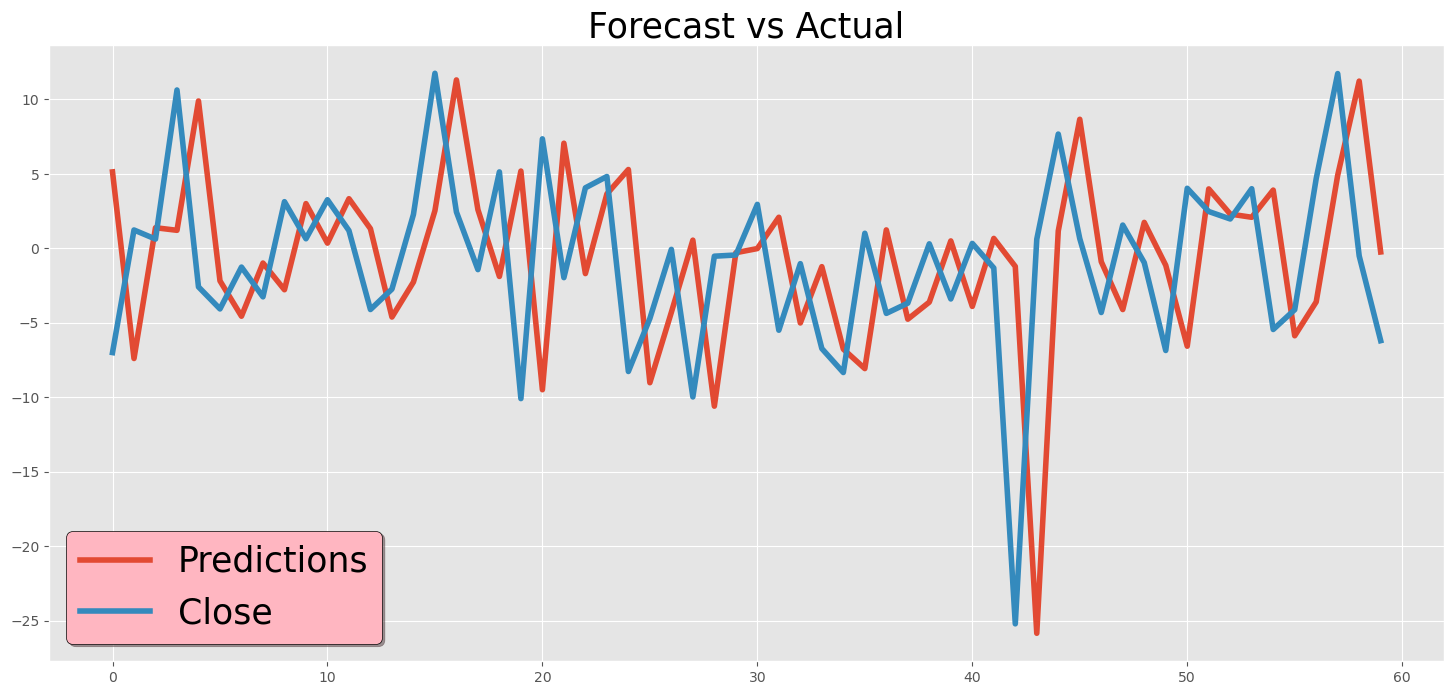

In [88]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')